<a href="https://colab.research.google.com/github/NimishSinghChouhan/Smart-Bridge-AI/blob/main/Smartbridge_AI_Day_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Regression ---> Target variable (123,34545,1313453.453,...)
# Classification ---> Target variable (0 or 1, cat or dog)

In [13]:
# Tensorflow and keras ---> Google product

In [42]:
#importing the required lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Reading the csv file

df = pd.read_csv('/content/50_Startups.csv')
df

R&D Spend  Administration  Marketing Spend       State     Profit
0    165349.20       136897.80        471784.10    New York  192261.83
1    162597.70       151377.59        443898.53  California  191792.06
2    153441.51       101145.55        407934.54     Florida  191050.39
3    144372.41       118671.85        383199.62    New York  182901.99
4    142107.34        91391.77        366168.42     Florida  166187.94
..         ...             ...              ...         ...        ...
103  119943.24       156547.42        256512.92     Florida  132602.65
104  114523.61       122616.84        261776.23    New York  129917.04
105   78013.11       121597.55        264346.06  California  126992.93
106   94657.16       145077.58        282574.31    New York  125370.37
107   91749.16       114175.79        294919.57     Florida  124266.90

[108 rows x 5 columns]

In [16]:
# Visualizing the 1st 5 observations 
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [17]:
df.head(10)

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
5  131876.90        99814.71        362861.36    New York  156991.12
6  134615.46       147198.87        127716.82  California  156122.51
7  130298.13       145530.06        323876.68     Florida  155752.60
8  120542.52       148718.95        311613.29    New York  152211.77
9  123334.88       108679.17        304981.62  California  149759.96

In [18]:
# Visualizing the last 1st 5 observations 
df.tail()

R&D Spend  Administration  Marketing Spend       State     Profit
103  119943.24       156547.42        256512.92     Florida  132602.65
104  114523.61       122616.84        261776.23    New York  129917.04
105   78013.11       121597.55        264346.06  California  126992.93
106   94657.16       145077.58        282574.31    New York  125370.37
107   91749.16       114175.79        294919.57     Florida  124266.90

In [19]:
# descriptive stat
df.describe()

R&D Spend  Administration  Marketing Spend         Profit
count     108.000000      108.000000       108.000000     108.000000
mean    74959.338704   121750.788889    214952.664722  113523.760000
std     44996.368152    27322.385654    117937.942120   38991.013654
min         0.000000    51283.140000         0.000000   14681.400000
25%     38558.510000   105077.645000    134050.070000   90708.190000
50%     75791.365000   122699.795000    239452.750000  109543.120000
75%    101913.080000   145077.580000    298664.470000  141585.520000
max    165349.200000   182645.560000    471784.100000  192261.830000

In [20]:
df.describe(include='all')

R&D Spend  Administration  Marketing Spend     State  \
count      108.000000      108.000000       108.000000       108   
unique            NaN             NaN              NaN         3   
top               NaN             NaN              NaN  New York   
freq              NaN             NaN              NaN        39   
mean     74959.338704   121750.788889    214952.664722       NaN   
std      44996.368152    27322.385654    117937.942120       NaN   
min          0.000000    51283.140000         0.000000       NaN   
25%      38558.510000   105077.645000    134050.070000       NaN   
50%      75791.365000   122699.795000    239452.750000       NaN   
75%     101913.080000   145077.580000    298664.470000       NaN   
max     165349.200000   182645.560000    471784.100000       NaN   

               Profit  
count      108.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean    113523.760000  
std      38991.013654  
min      14681.400000  
25%      90708.190000  
50%     109543.120000  
75%     141585.520000  
max     192261.830000

In [21]:
# Check the null values
df.isnull()

R&D Spend  Administration  Marketing Spend  State  Profit
0        False           False            False  False   False
1        False           False            False  False   False
2        False           False            False  False   False
3        False           False            False  False   False
4        False           False            False  False   False
..         ...             ...              ...    ...     ...
103      False           False            False  False   False
104      False           False            False  False   False
105      False           False            False  False   False
106      False           False            False  False   False
107      False           False            False  False   False

[108 rows x 5 columns]

In [22]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [23]:
# We are not having any null values we can skip handling null values step


In [24]:
df['Profit'].dtype

dtype('float64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


<Axes: >

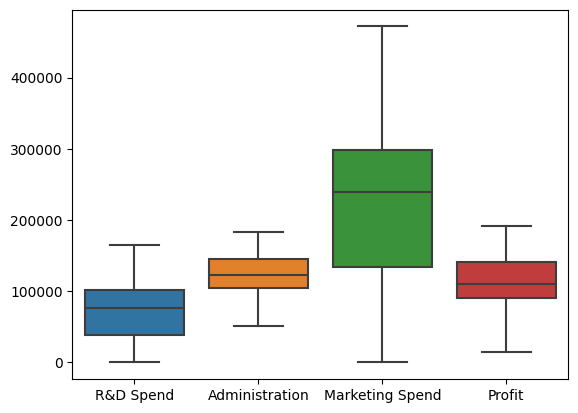

In [46]:
sns.boxplot(df)

In [48]:
# Splitting the data

# Step 1: Split dependent and in-dependent
# Step 2: Split training and testing data

In [49]:
x = df.iloc[:,0:4]     #iloc[:,:]
x.head(2)

R&D Spend  Administration  Marketing Spend       State
0   165349.2       136897.80        471784.10    New York
1   162597.7       151377.59        443898.53  California

In [50]:
y=df['Profit']
y[0:2]

0    192261.83
1    191792.06
Name: Profit, dtype: float64

In [27]:
# Encoding ---> One Hot encoding -- label encoding -- manual encoding

In [28]:
"""
# One Hot Encoding

Florida  New York  California
   0        1          0
   0        0          1
   1        0          0
   0        1          0
   1        0          0

# Label encoding 
Automatically lib will assign value to the text (values will be assigned based on the Alphabetical order)

Florida, New York and California - 1,2,0

# Manual encoding

User defining the value for the text
"""

'\n# One Hot Encoding\n\nFlorida  New York  California\n   0        1          0\n   0        0          1\n   1        0          0\n   0        1          0\n   1        0          0\n\n# Label encoding \nAutomatically lib will assign value to the text (values will be assigned based on the Alphabetical order)\n\nFlorida, New York and California - 1,2,0\n\n# Manual encoding\n\nUser defining the value for the text\n'

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder() # initialize the lib

In [33]:
 le.fit_transform(df['State'])

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2,
       0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1])

<Axes: >

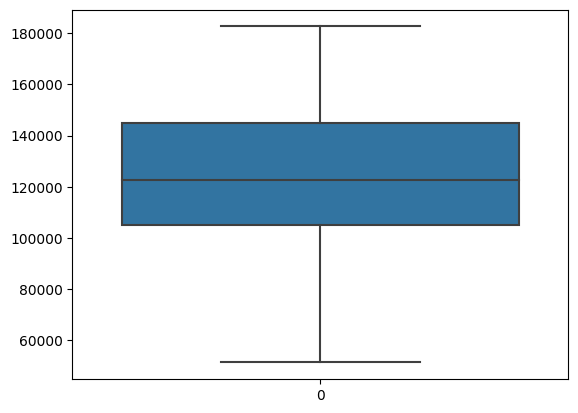

In [37]:
sns.boxplot(df['Administration'])

In [38]:
names= df.columns
names

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

ValueError: ignored

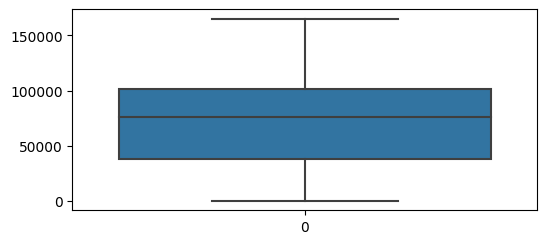

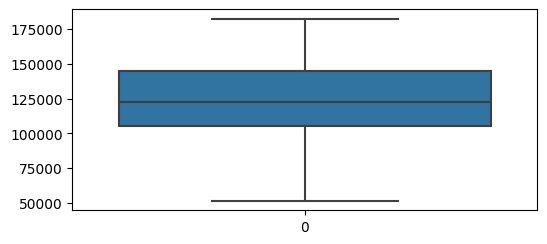

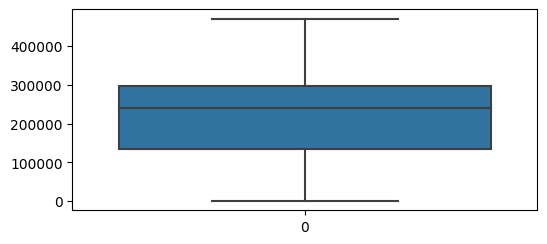

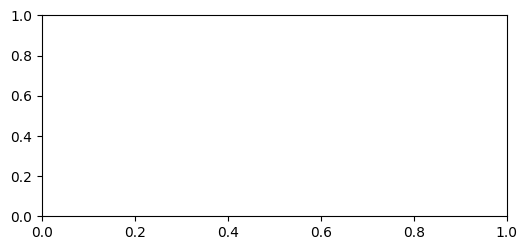

In [47]:
for i,j in enumerate(names):
  plt.figure(figsize=(6,12))
  plt.subplot(4,1,i+1)
  sns.boxplot(df[j])